## cvtColor() 色彩空间转换

Converts an image from one color space to another.

The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.

The conventional ranges for R, G, and B channel values are:

0 to 255 for CV_8U images
0 to 65535 for CV_16U images
0 to 1 for CV_32F images
In case of linear transformations, the range does not matter. But in case of a non-linear transformation, an input RGB image should be normalized to the proper value range to get the correct results, for example, for RGB → L*u*v* transformation. For example, if you have a 32-bit floating-point image directly converted from an 8-bit image without any scaling, then it will have the 0..255 value range instead of 0..1 assumed by the function. So, before calling cvtColor , you need first to scale the image down:

img *= 1./255;
cvtColor(img, img, COLOR_BGR2Luv);
If you use cvtColor with 8-bit images, the conversion will have some information lost. For many applications, this will not be noticeable but it is recommended to use 32-bit images in applications that need the full range of colors or that convert an image before an operation and then convert back.

If conversion adds the alpha channel, its value will set to the maximum of corresponding channel range: 255 for CV_8U, 65535 for CV_16U, 1 for CV_32F.

Parameters
- src	input image: 8-bit unsigned, 16-bit unsigned ( CV_16UC... ), or single-precision floating-point.
- dst	output image of the same size and depth as src.
- code	color space conversion code (see ColorConversionCodes).
- dstCn	number of channels in the destination image; if the parameter is 0, the number of the channels is derived automatically from src and code.
  
  dst	=	cv.cvtColor(	src, code[, dst[, dstCn]]	)


In [32]:
import cv2
import matplotlib.pyplot as plt

In [40]:
img = cv2.imread("dog.png")

In [49]:
# BGR to HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

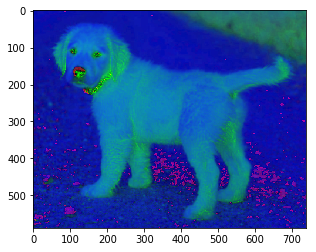

In [42]:
plt.imshow(hsv_img)

In [45]:
# BGR to RGB
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

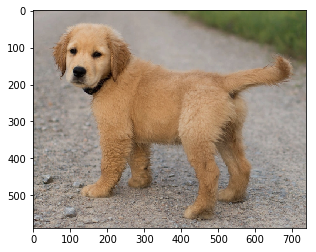

In [46]:
plt.imshow(rgb_img)

---

## cvtColorTwoPlane() 支持YUV420 to RGB

Converts an image from one color space to another where the source image is stored in two planes.   
  
This function only supports YUV420 to RGB conversion as of now.   
  
Parameters  
- src1	8-bit image (CV_8U) of the Y plane.
- src2	image containing interleaved U/V plane.
- dst	output image.
- code	Specifies the type of conversion. It can take any of the following values:  

- COLOR_YUV2BGR_NV12
- COLOR_YUV2RGB_NV12
- COLOR_YUV2BGRA_NV12
- COLOR_YUV2RGBA_NV12
- COLOR_YUV2BGR_NV21
- COLOR_YUV2RGB_NV21
- COLOR_YUV2BGRA_NV21
- COLOR_YUV2RGBA_NV21
  
dst	=	cv.cvtColorTwoPlane(	src1, src2, code[, dst]	)


## demosaicing() 去马赛克

main function for all demosaicing processes

Parameters
src	input image: 8-bit unsigned or 16-bit unsigned.
dst	output image of the same size and depth as src.
code	Color space conversion code (see the description below).
dstCn	number of channels in the destination image; if the parameter is 0, the number of the channels is derived automatically from src and code.
The function can do the following transformations:

Demosaicing using bilinear interpolation

COLOR_BayerBG2BGR , COLOR_BayerGB2BGR , COLOR_BayerRG2BGR , COLOR_BayerGR2BGR

COLOR_BayerBG2GRAY , COLOR_BayerGB2GRAY , COLOR_BayerRG2GRAY , COLOR_BayerGR2GRAY

Demosaicing using Variable Number of Gradients.

COLOR_BayerBG2BGR_VNG , COLOR_BayerGB2BGR_VNG , COLOR_BayerRG2BGR_VNG , COLOR_BayerGR2BGR_VNG

Edge-Aware Demosaicing.

COLOR_BayerBG2BGR_EA , COLOR_BayerGB2BGR_EA , COLOR_BayerRG2BGR_EA , COLOR_BayerGR2BGR_EA

Demosaicing with alpha channel

COLOR_BayerBG2BGRA , COLOR_BayerGB2BGRA , COLOR_BayerRG2BGRA , COLOR_BayerGR2BGRA
  
   
dst	=	cv.demosaicing(	src, code[, dst[, dstCn]]	)



In [50]:
import cv2
import matplotlib.pyplot as plt

In [51]:
img = cv2.imread("dog.png")

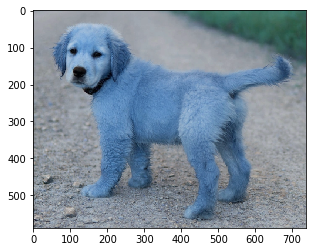

In [53]:
plt.imshow(img)

In [58]:
img = cv2.demosaicing(img,cv2.COLOR_BayerBG2BGR)

error: OpenCV(4.1.1) /Users/shawn/InstallPackage/opencv-4.1.1/modules/imgproc/src/demosaicing.cpp:1700: error: (-215:Assertion failed) scn == 1 && (dcn == 3 || dcn == 4) in function 'demosaicing'
